In [18]:
def read_file(file_name):
    with open(file_name, 'r') as file:
        problem = []
        for line in file:
            if line.strip():
                row = list(map(int, line.split()))
                problem.append(row)
    return problem

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
from GA import genetic_algorithm

def solve(problem, 
          population_size=100, 
          generations=100, 
          mutation_rate=0.1, 
          mutation_algorithm='swap', 
          crossover_algorithm='order', 
          selection_algorithm='elitism'):
    n_cities = len(problem)
    
    solution = genetic_algorithm(n_cities, problem, 
                                 population_size=population_size, 
                                 generations=generations, 
                                 mutation_rate=mutation_rate, 
                                 mutation_algorithm=mutation_algorithm, 
                                 crossover_algorithm=crossover_algorithm, 
                                 selection_algorithm=selection_algorithm)
    
    return solution['distance'], solution['route'], solution['fitness']

def visualize(problem, route, draw_weight=False, initial=False):
    n_cities = len(problem)
    
    # Create a graph
    G = nx.Graph()
    for i in range(n_cities):
        for j in range(i + 1, n_cities):
            G.add_edge(i, j, weight=problem[i][j])

    pos = nx.circular_layout(G, scale=2)

    plt.figure(figsize=(14, 7))
    if initial:
        plt.subplot(121)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
        if draw_weight:
            labels = nx.get_edge_attributes(G, 'weight')
            nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=5, label_pos=0.5)
        plt.title("Initial Graph")

    # Highlight the best route and remove non-route edges for clarity
    route_edges = [(route[i], route[i + 1]) for i in range(len(route) - 1)]
    route_edges.append((route[-1], route[0]))  # Complete the cycle

    # Remove non-route edges
    non_route_edges = [edge for edge in G.edges() if edge not in route_edges and (edge[1], edge[0]) not in route_edges]
    G.remove_edges_from(non_route_edges)

    plt.subplot(122)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=route_edges, edge_color='r', width=2)
    if draw_weight:
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=5, label_pos=0.6)
    plt.title(f"Best Route\n{route}")

    plt.show()
def plot_fitness(fitness):
    plt.plot(fitness)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness over generations")
    plt.show()

In [20]:
problem1 = read_file('data/15Cities-1194.txt')

In [21]:
# với bộ tham số này, bộ ba tham số mặc định sẽ giải quyết được trường hợp 15 đỉnh với tốc độ khá nhanh
# nhưng giải quyết trường hợp 26 đỉnh sẽ không tìm ra được kq chính xác
distances1, route1, fitness1 = solve(problem1, generations=200, mutation_rate=0.05, population_size=200)
while (distances1 != 1194):
    distances1, route1, fitness1 = solve(problem1, generations=200, mutation_rate=0.05, population_size=200)
print(distances1)
print(route1)

1194
[0, 1, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 0]


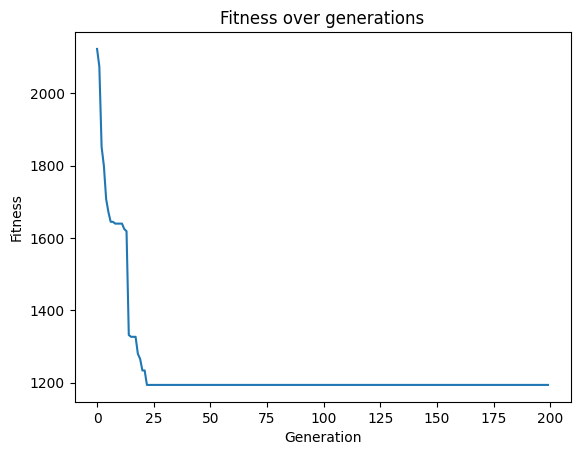

In [22]:
# lúc này, ta sẽ được hình vẽ từ hàm fitnesss như sau:
# plot_fitness(fitness1)
plot_fitness(fitness1)

In [23]:
problem2 = read_file('data/26Cities-937.txt')

989
[0, 14, 13, 10, 12, 11, 20, 21, 24, 23, 22, 25, 16, 17, 19, 18, 15, 9, 8, 7, 6, 4, 5, 3, 2, 1, 0]


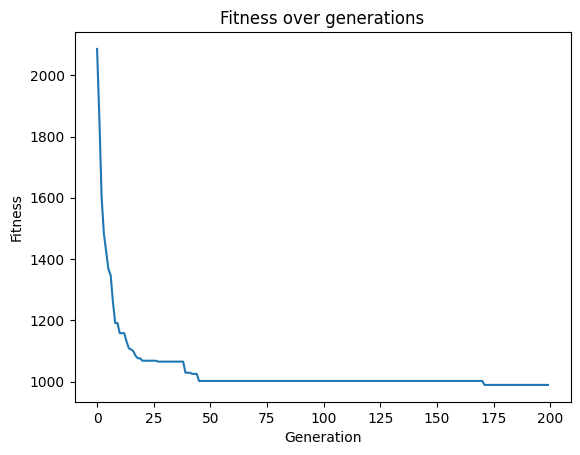

In [54]:
# Khi tăng đồng thời 2 tham số generations và population_size, kết quả tối ưu nhất đạt đc là xấp xỉ 1000. Khá là gần với kết quả tối ưu
distances2, route2, fitness2 = solve(problem2, generations=200, mutation_rate=0.1, population_size=300)
while (distances2 > 1050):
    distances2, route2, fitness2 = solve(problem2, generations=200, mutation_rate=0.1, population_size=300)
print(distances2)
print(route2)
plot_fitness(fitness2)

In [25]:
# Khi tăng đồng thời 2 tham số generations và population_size, kết quả tối ưu nhất đạt đc là 968. Khá là gần với kết quả tối ưu
distances, route, fitness = solve(problem, generations=200, mutation_rate=0.11, population_size=100)
# while (distances != 937):
#     distances, route, fitness = solve(problem, generations=300, mutation_rate=0.07, population_size=500)
print(distances)
print(route)

1144
[0, 14, 12, 20, 16, 17, 19, 18, 15, 9, 13, 2, 1, 3, 5, 4, 6, 7, 8, 10, 11, 24, 23, 22, 25, 21, 0]
